In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#feature selection
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics


#model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model



In [ ]:
#reading the data
df = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
#getting top 5 records
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#number of rows and columns
df.shape

(10683, 11)

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#imputing null values with mode
df['Route'].fillna(df['Route'].mode().iloc[0],inplace=True)

In [ ]:
#imputing null value with mode
df['Total_Stops'].fillna(df['Total_Stops'].mode().iloc[0],inplace=True)

In [ ]:
#checking for total null values in the data
df.isnull().sum().sum()

0

In [ ]:
#checking for duplication of the data
df.duplicated().sum()

220

In [ ]:
#deleting the duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
#checking for total duplicate values
df.duplicated().sum()

0

Few of the datapoints in the data are same but with different naming notion
1. Delhi and New Delhi are same in "Destination" feature
2. No info and No Info are same in "Additional info" feature

In [ ]:
#converting New Delhi -> Delhi
df.loc[df['Destination'].str.contains('New Delhi'), 'Destination'] = 'Delhi'

In [ ]:
#converting No Info -> No info
df.loc[df['Additional_Info'].str.contains('No Info'), 'Additional_Info'] = 'No info'

# 1. ***Top 5 most preferred airlines by customers :***

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

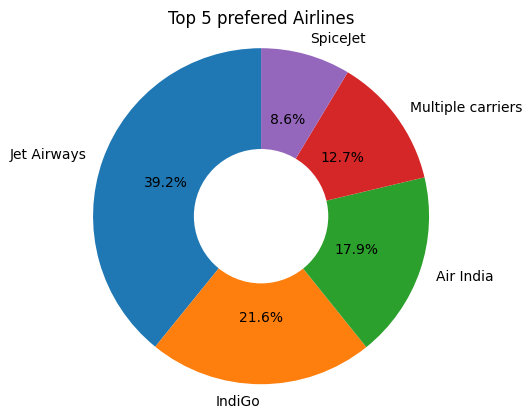

In [ ]:
#getting top 5 most used airlines
airline_counts = df['Airline'].value_counts().sort_values(ascending=False)
# Create a pie chart using matplotlib
plt.pie(airline_counts[:5], labels=airline_counts.index[:5], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 prefered Airlines')
plt.show()

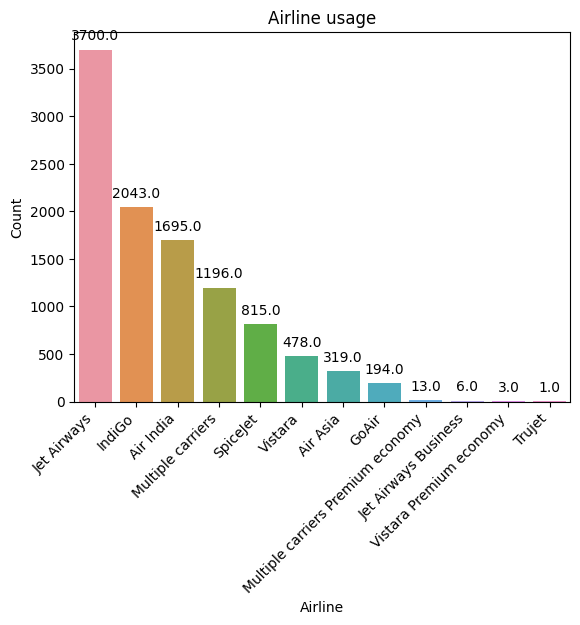

In [ ]:
#data visualization
sorted_categories = airline_counts.index
ax = sns.countplot(x='Airline', data=df,order =sorted_categories ) #creates boxplot
plt.xticks(rotation=45, ha='right')
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline usage')

# Display the plot
plt.show()

1. Most used airline is Jet Airways (39% of all flights, 3700 flights)
2. Second place is IndiGo (21% of all flights, 2043 flights)
3. Less used airline is Truejet (>0.1% of all flights, 1 flight)

# ***2. Price range of each airline***

In [ ]:
#getting the mean,max,min prices for each airline
each_airline = df.groupby(['Airline']).agg({'Price':['min','max','mean']}).round(2).reset_index()
each_airline

Airline  Price                 
                                         min    max      mean
0                            Air Asia   3383  13774   5590.26
1                           Air India   2050  31945   9555.38
2                               GoAir   3398  22794   5861.06
3                              IndiGo   2227  22153   5668.47
4                         Jet Airways   1840  54826  11599.02
5                Jet Airways Business  46490  79512  58358.67
6                   Multiple carriers   5797  36983  10902.68
7   Multiple carriers Premium economy   9845  14629  11418.85
8                            SpiceJet   1759  23267   4335.84
9                              Trujet   4140   4140   4140.00
10                            Vistara   3687  21730   7801.36
11            Vistara Premium economy   5969  11793   8962.33

Text(0.5, 1.0, 'Price for each Airline')

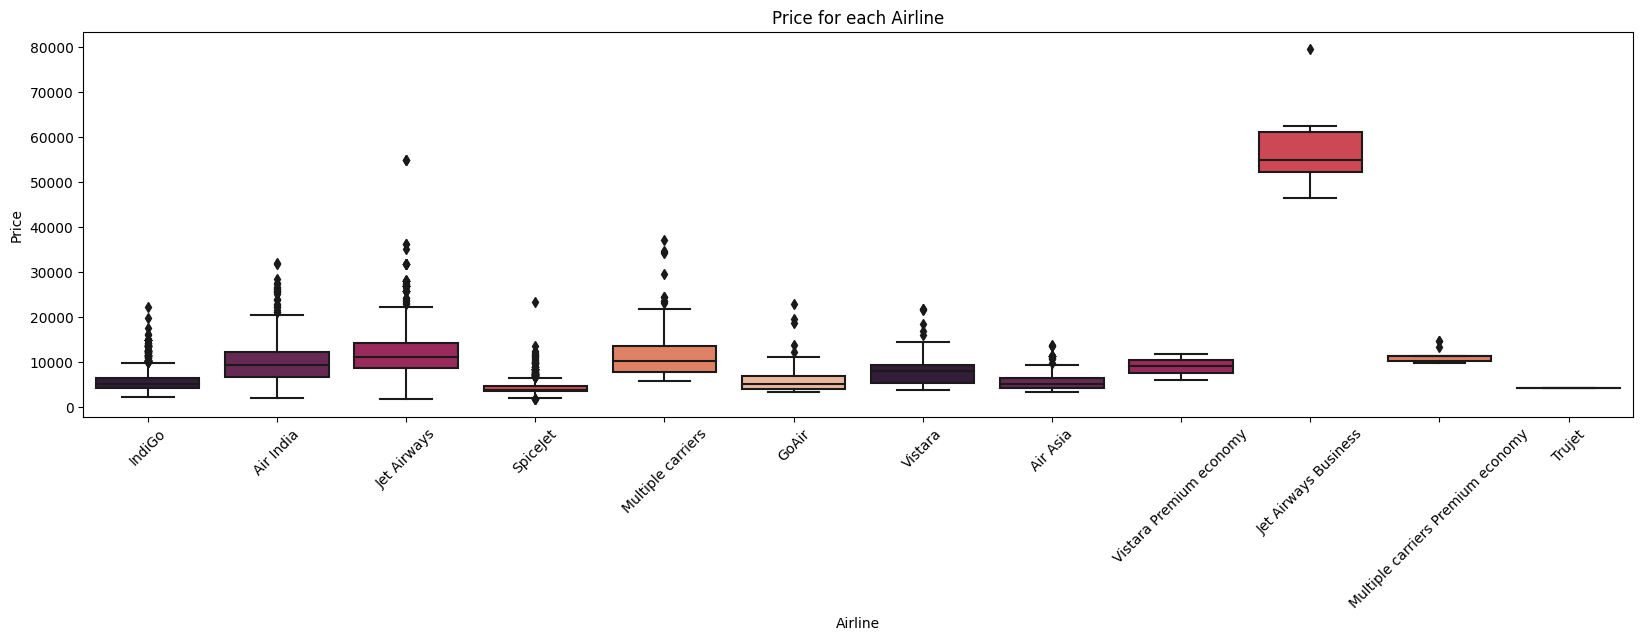

In [ ]:
#data visualization between airline and prices

plt.figure(figsize=(20,5))
sns.boxplot(x='Airline', y='Price', data=df, palette=sns.color_palette("rocket")) #creates boxplot
plt.xticks(rotation=45)

plt.title('Price for each Airline') #sets a title for the figure

1. The most economy for travel is Trujet, followed by SpiceJet and Jet Airways.
2. For luxe travel Jet Airways Business can be considered

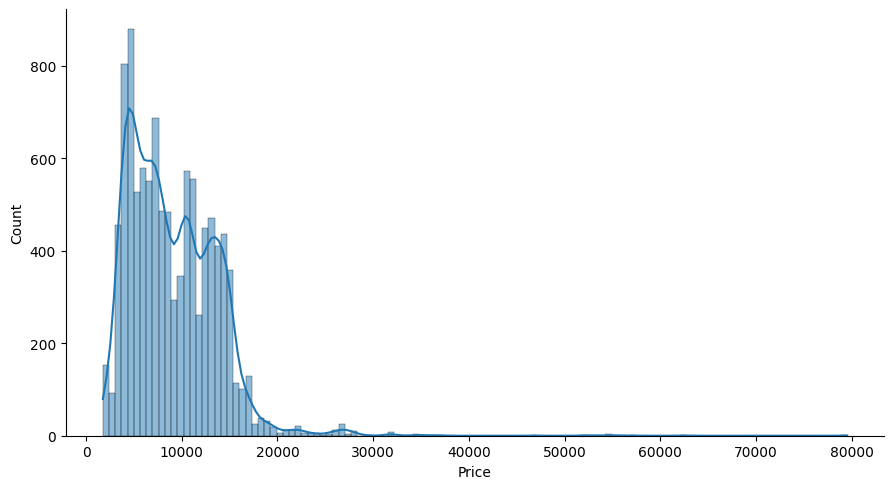

In [ ]:
# data visualization for total price  distribution
sns.displot(x=df['Price'], data=df, kde=True).fig.set_figwidth(10)
plt.show()

# 3. ***Most preferd source(place) for boarding:***


In [ ]:
source_counts = df['Source'].value_counts().sort_values(ascending=False)
source_counts

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

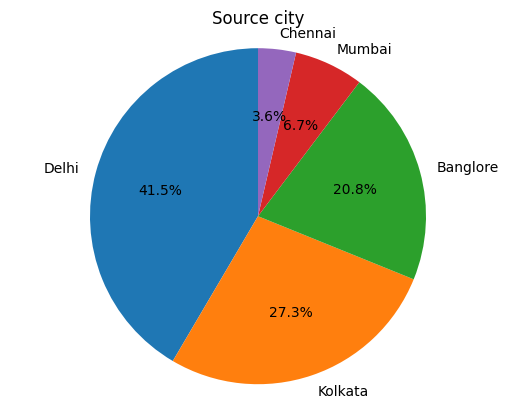

In [ ]:
# Create a pie chart using matplotlib for source column
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Source city')
plt.show()

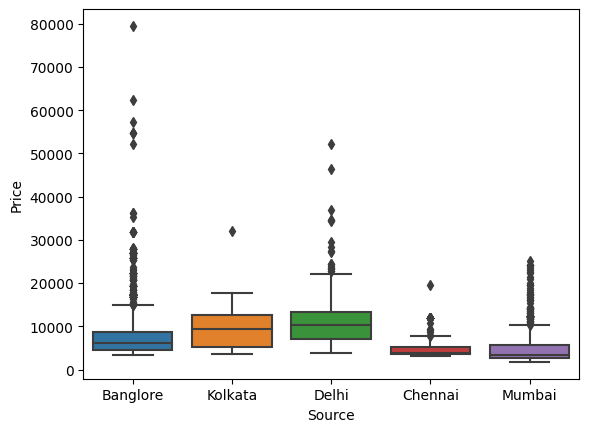

In [ ]:
#boxplot between source and price
sns.boxplot(x='Source',y='Price',data=df)
plt.show()

1. Most prefer place for boarding is Delhi(41.5%)
2. Second most prefered place is Kolkata(27%)
3. Least prefered place is Chennai (3.6% of total)

# *4. Most preferred Destination*

In [ ]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

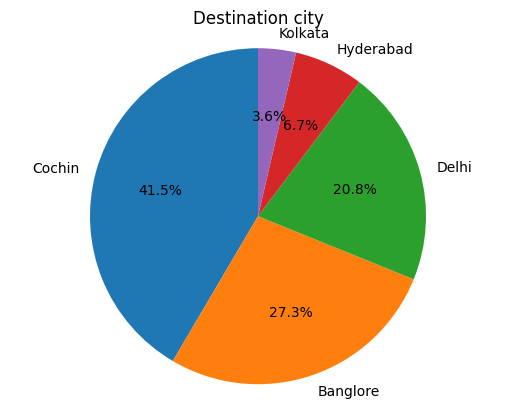

In [ ]:
destination_counts = df['Destination'].value_counts().sort_values(ascending=False)

# Create a pie chart using matplotlib
plt.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Destination city')
plt.show()

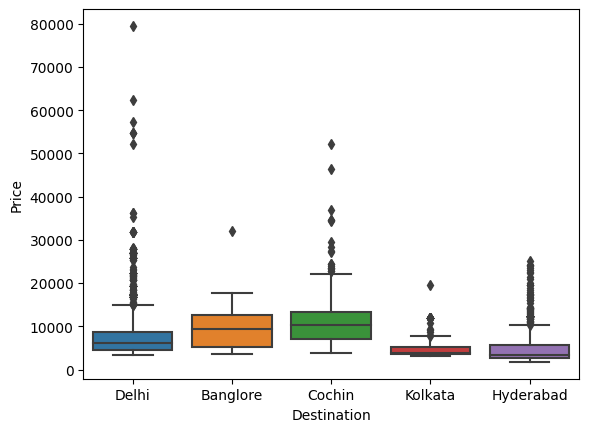

In [ ]:
#boxplot between destination and price
sns.boxplot(x='Destination',y='Price',data=df)
plt.show()

1. Most prefer destination is Cochin(41.5%)
2. Second most prefered place is Banglore(27%)
3. Least prefered place is Kolkata (3.6% of total)

# ***4. Most prefered day of journey***

In [ ]:
#Date_of_journey is given is string format, so converting to date format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')


In [ ]:
#extracting week from the date
week = df['Date_of_Journey'].dt.day_name().value_counts().reset_index()
week.rename(columns={'index':'day_week','Date_of_Journey':'count'},inplace=True)

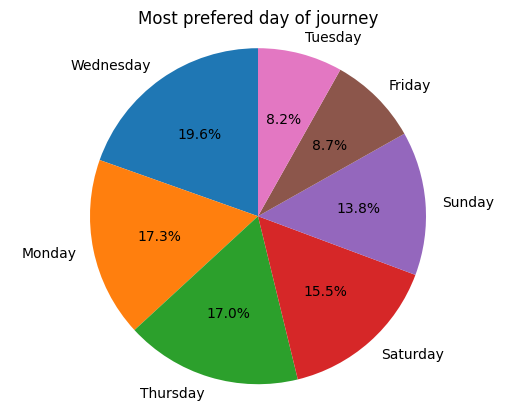

In [ ]:
plt.pie(week['count'], labels=week['day_week'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Most prefered day of journey')
plt.show()

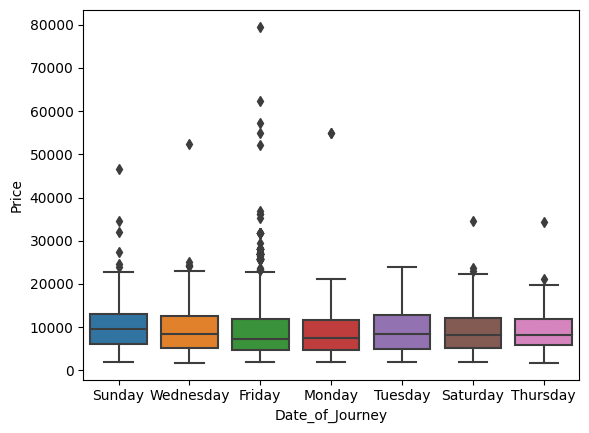

In [ ]:
#boxplot between day of journey and price
sns.boxplot(x=df['Date_of_Journey'].dt.day_name(), y='Price', data=df)
plt.show()

1. Most prefered day of journey is Wedesday(19.6%), followed by Monday(17.3%) and Thursday(17%).
2. Least prefered day of journey is Friday(8.7%) and Tuesday(8.2%).

# **5. Minimum and maxiumum prices to reach from source to destination with number of unique routes and number of airline services**

In [ ]:
#getting the price details for source and destination
df.groupby(['Source','Destination']).agg({'Price':['min','max','mean'],
                                          'Route':pd.Series.nunique,
                                         'Airline':pd.Series.nunique}).round(2)

Price                    Route Airline
                       min    max      mean nunique nunique
Source   Destination                                       
Banglore Delhi        3257  79512   8022.87      36       9
Chennai  Kolkata      3145  19630   4789.89       1       5
Delhi    Cochin       3876  52285  10460.91      30      10
Kolkata  Banglore     3480  31945   9143.08      38       7
Mumbai   Hyderabad    1759  25139   5059.71      23       6

1. Average travel cost is from Delhi->Cochin is highest (10,460/-) and contains more airlines in that route
2. Followed by Kolkata -> Banglore (9,143/-)
3. Least travel cost is from Chennai -> Kolkata (4,740/-) and contains less flights.


# ***7. Are stops affecting the price***

In [ ]:
df.Total_Stops.value_counts()

1 stop      5626
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

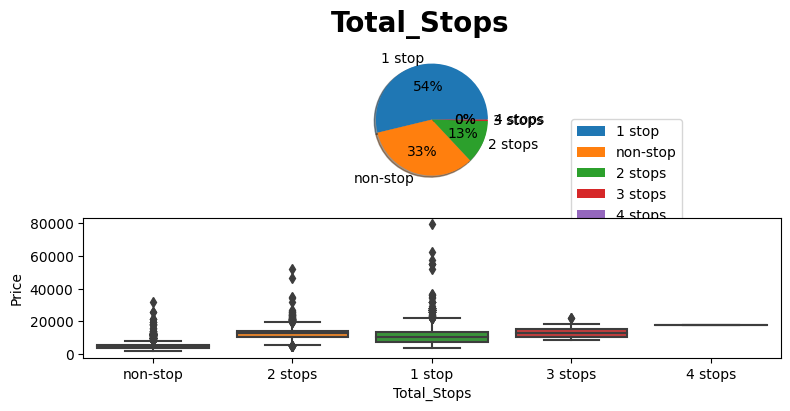

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(9, 4))
fig.suptitle('Total_Stops', fontsize=20, fontweight='bold')
# Top ax
labels = df.Total_Stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(df.Total_Stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=ax[1])
plt.show()

1. About 54% of flights have 1 stop
2. Nearly 33% flights have non-stop flights
3. <1% of flights have 4-stops

## ***Does additional info affect the price***

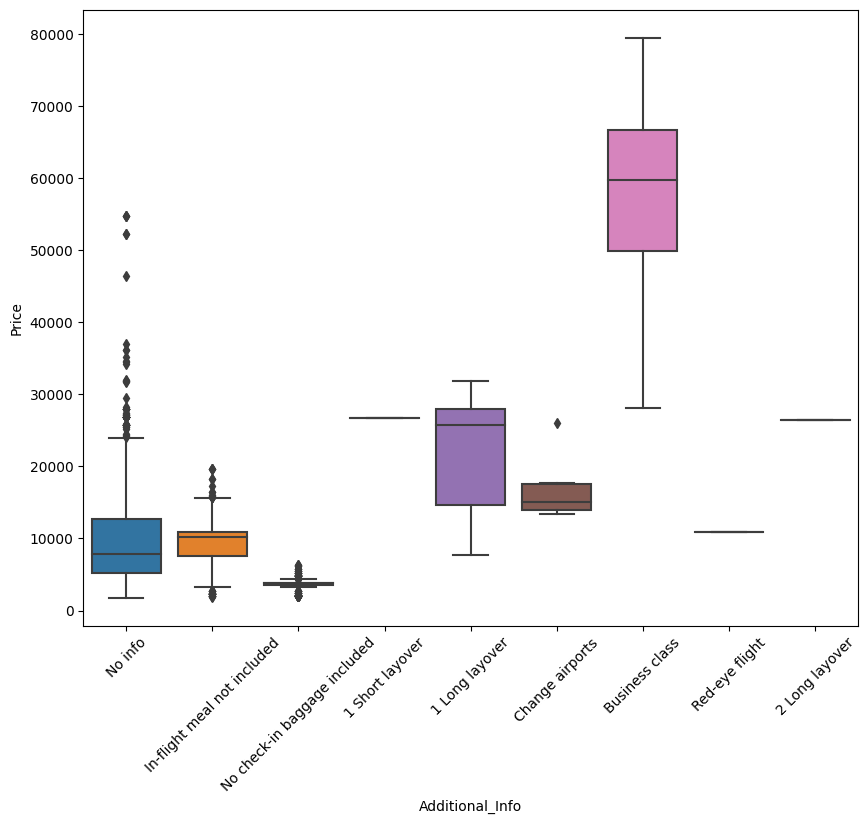

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Additional_Info', y='Price', data=df)

plt.xticks(rotation=45)

plt.show()

1. Business class have more fare
2. followed by one long layover


## ***Data Preprocessing***

`1. Date_of_Journey`

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

* For this we require pandas to_datetime to convert object data type to datetime dtype.

1. .dt.day method will extract only day of that date
2. .dt.month method will extract only month of that date

In [ ]:
#extracting day from date
df['day'] = df['Date_of_Journey'].dt.day

#extarcting month from date
df['month'] = df['Date_of_Journey'].dt.month

#Since the unique year is 2019 we ignore the extracting of year
df.drop(['Date_of_Journey'],axis=1,inplace=True)

`2. Dep_Time`:
Depature time is given as object type so need to convert to datetime and extracting hours and minutes

In [ ]:
#extracting hour and minutes
df['dep_hour'] = pd.to_datetime(df["Dep_Time"]).dt.hour
df['dep_min'] = pd.to_datetime(df["Dep_Time"]).dt.minute

#drop dep_time
df.drop(["Dep_Time"], axis=1, inplace=True)

`3.Arrival_Time`:
Arrival time is given as object type so need to convert to datetime and extracting hours and minutes

In [ ]:
# extarcting hour and minutes f
df['arrival_hour'] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df['arrival_min'] = pd.to_datetime(df["Arrival_Time"]).dt.minute

#drop arrival time
df.drop(["Arrival_Time"], axis=1, inplace=True)

`4.Duration`:
Duration time is given as object type so need to convert to datetime and extracting hours and minutes

In [ ]:
#Some data in Duration are in format 2h 50m, 40h, 50m, we need to convert every data into 0h 0m format

duration = df['Duration'].values

for i in range(len(duration)):
  if len(duration[i].split(' ')) !=2: #spliting the data [2h , 50m] andgth checking the len
    if 'h' in duration[i] :           #if hours in data add 0minutes
      duration[i] = duration[i]+' '+'0m'
    else:
      duration[i] = '0h'+' '+duration[i] #else add 0hours


#now the entire data is in 0h 0m format, we extract hours and minutes
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split('h')[0]))   #split by h -> ['8', ' 20m']
  duration_minutes.append(int(duration[i].split('m')[0].split(' ')[-1]) )#split by m -> ['8h 20', ''] then split by ' ' ->['8h',20]


#adding duration hours and minutes as features to dataframe df
df['duration_hours'] = duration_hours
df['duration_minutes'] = duration_minutes


#dropping the duration column
df.drop('Duration', axis=1, inplace=True)

`5.Airline`:
Airline is string datatype for preprocessing we need to convert into numerical dtype, Since it is a NOMINAL categorical variable we can proceed with:
1. Sklearn - OneHotEncoder()
2. Pandas - pd.get_dummies()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


`6.Source`:
Source : NOMINAL categorical variable

In [ ]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head(2)


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


`7.Destination`:
Destination : NOMINAL categorical variable

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0


`8.Total_Stops`:
Total_Stops : NOMINAL categorical variable

In [ ]:
#mapping the categorical values to numerical values
df['Total_Stops'] = df['Total_Stops'].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

`9.Dropping the columns which are not required in preprocessing`

In [ ]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

`10. Concatenating the scaled features to original dataframe`

In [ ]:
#concatenating the scaled features to existing dataframe df
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [ ]:
#droping the values from df
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [ ]:
df.head(2)

,Total_Stops,Price,day,month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_minutes,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(10463, 29)

# ***Feature Selection***

Purpose: To choose a subset of relevant features from the original set. This helps in reducing model complexity, improving training speed, and mitigating the risk of overfitting.Following are some of the feature selection methods,

###1. heatmap :
 Correlation-based Methods: Remove highly correlated features to avoid redundancy.
### 2. feature_importance_:
Decision tree-based models (e.g., Random Forest, XGBoost) provide feature importance scores that can be used for feature selection.
###3. SelectKBest :
Select the top k features based on univariate statistical tests.


`1. HEATMAPS:`

In [ ]:
#getting the required features need for correlation with target variable (Price)
corr_data = df[['Total_Stops','Price','dep_hour','dep_min',
       'arrival_hour', 'arrival_min', 'duration_hours', 'duration_minutes']]

<Axes: >

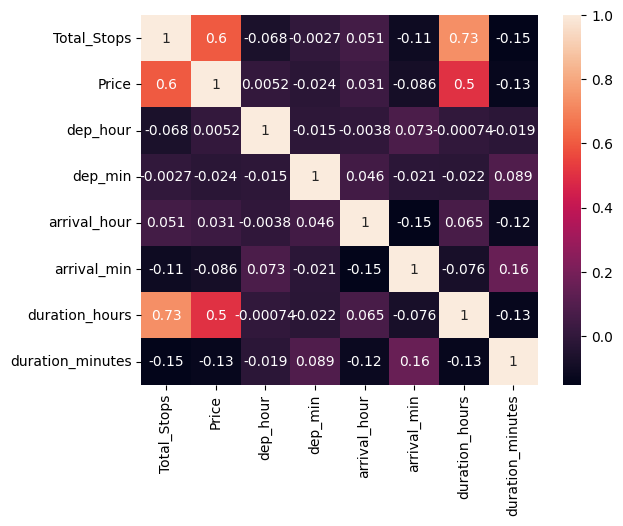

In [ ]:
#heatmap to visualize the correlation value
sns.heatmap(corr_data.corr(), annot=True)

1. 'Price', the target varibale is highly correlated with 'Total_Stops'(+0.6) and duration_hours(+0.5)
2. There is also correlation between independent variables i.e.., Duration and Total_stops(+0.73)

`2. FEATURE_IMPORTANCE`

In [ ]:
#divinding the data into target and indepedent variables
y = df['Price']
x= df.drop('Price',axis=1)

In [ ]:
#intializing model
extra_tree = ExtraTreesRegressor()

#fitting the data
extra_tree.fit(x, y)

ExtraTreesRegressor()

Text(0.5, 1.0, 'Feature Importances')

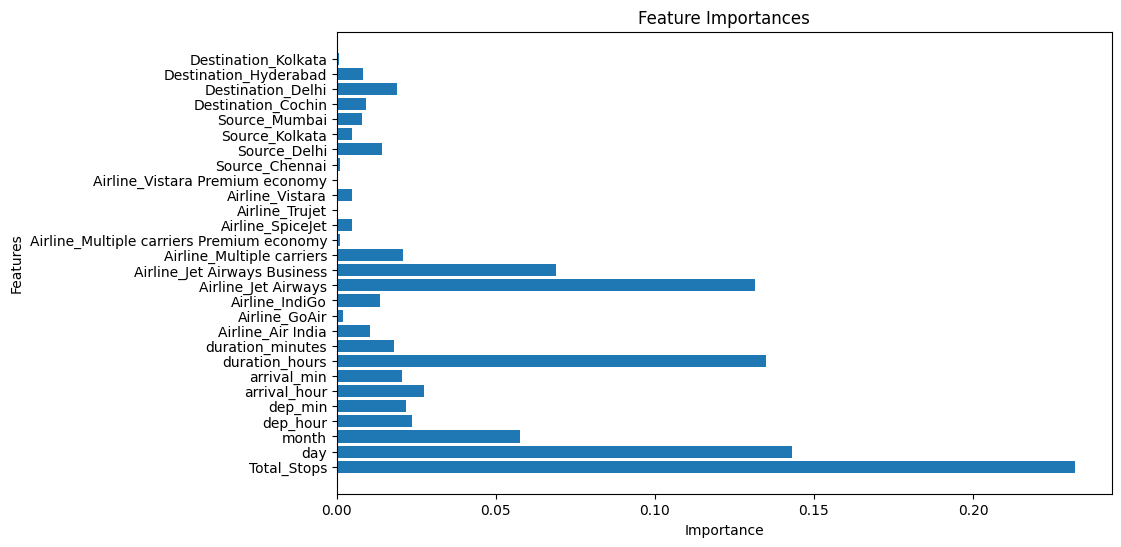

In [ ]:
# Feature importances
feature_importances = extra_tree.feature_importances_

# Associate feature names with their importance scores
feature_names = x.columns
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')

`3. SelectKBest`

In [ ]:
#initialzing the model
k_best = SelectKBest(score_func=f_regression)

#fitting the model
k_best.fit(x, y)

SelectKBest(score_func=<function f_regression at 0x7d571a143e20>)

In [ ]:
#getting the best features
k_best.get_feature_names_out()

array(['Total_Stops', 'duration_hours', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_SpiceJet', 'Source_Delhi', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad'], dtype=object)

## ***MODEL-1 : RANDOM FOREST REGRESSOR***

In [ ]:
#dividing data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#model initailizing
random_forest = RandomForestRegressor()

#Build a forest of trees from the training set (X, y).
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Predict regression target for X_test
y_pred = random_forest.predict(X_test)

In [ ]:
#Return the coefficient of determination of the prediction of X_train
random_forest.score(X_train, y_train)

0.9545998466471122

In [ ]:
#Return the coefficient of determination of the prediction of X_test
random_forest.score(X_test, y_test)


0.8139441970985135

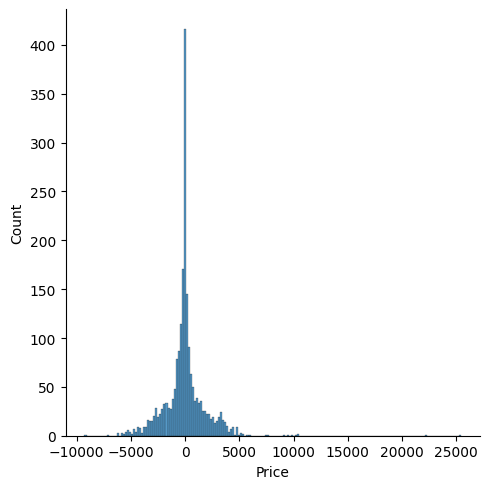

In [ ]:
#distribution plot the difference between prediction and actual values
sns.displot(y_test-y_pred)
plt.show()

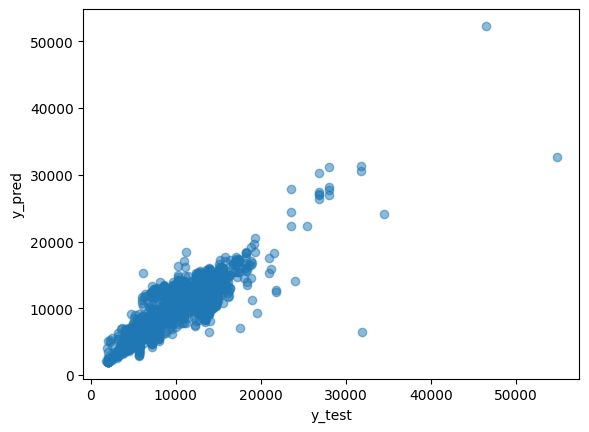

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## ***Evaluating the performance of a model :***
1. Mean Squared Error (MSE):
  * $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

  * MSE is a metric that measures the average squared difference between predicted and actual values.

  * Lower values indicate better performance.



 2. Root Mean Squared Error (RMSE):
   * $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$
  * RMSE is the square root of the Mean Squared Error (MSE), providing a measure of the average magnitude of the errors in the same units as the target variable.

   * Similar to MSE but in the same scale as the target variable.

 3. Mean Absolute Error (MAE):
   * $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

   * MAE is a metric that measures the average absolute difference between predicted and actual values
   *  Represents the average absolute difference between actual and predicted values.

 4. R-squared (Coefficient of Determination):
  * $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

  * Coefficient of Determination score is a metric that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

  * Measures the proportion of the variance in the dependent variable explained by the model. A higher R_squared indicates better performance.



In [ ]:
# Mean Absolute Error (MAE) is a metric that measures the average absolute difference between predicted and actual values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

#The Mean Squared Error (MSE) is a metric that measures the average squared difference between predicted and actual values.
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

#The RMSE is the square root of the Mean Squared Error (MSE), providing a measure of the average magnitude of the errors in the same units as the target variable.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1195.7977491752554
MSE: 3881997.3130364656
RMSE: 1970.2784861629245


In [ ]:
# RMSE/(max(DV)-min(DV))

1959.462/(max(y)-min(y))

0.02520111121114298

In [ ]:
# Coefficient of Determination score is a metric that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
metrics.r2_score(y_test, y_pred)

0.8139441970985135

## ***Hyperparameter tuning :***

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model.

* Choose following method for hyperparameter tuning
  1. RandomizedSearchCV --> Fast
  2. GridSearchCV
* Assign hyperparameters in form of dictionery Fit the model
* Check best paramters and best score

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = random_forest,
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10,
                               cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = 1)

rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.3s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#getting the best parameteres
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
prediction = rf_random.predict(X_test)


<Figure size 800x800 with 0 Axes>

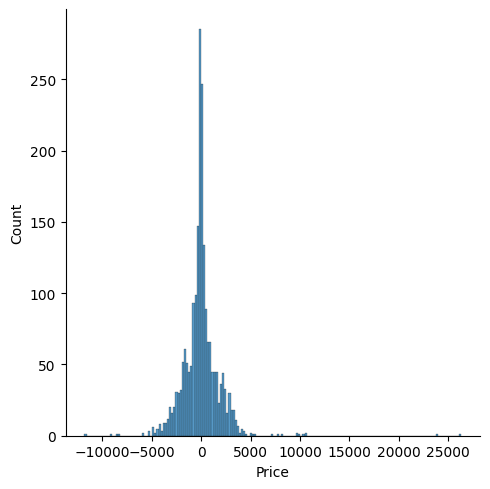

In [ ]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1158.0234712588099
MSE: 3491354.980063973
RMSE: 1868.5167861338502


In [ ]:
y_prediction = rf_random.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.8326668460463708

## ***MODEL-2: ARTIFICAL NEURAL NETWORK***

In [174]:
# Define a simple regression model
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

#output layer
model.add(layers.Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

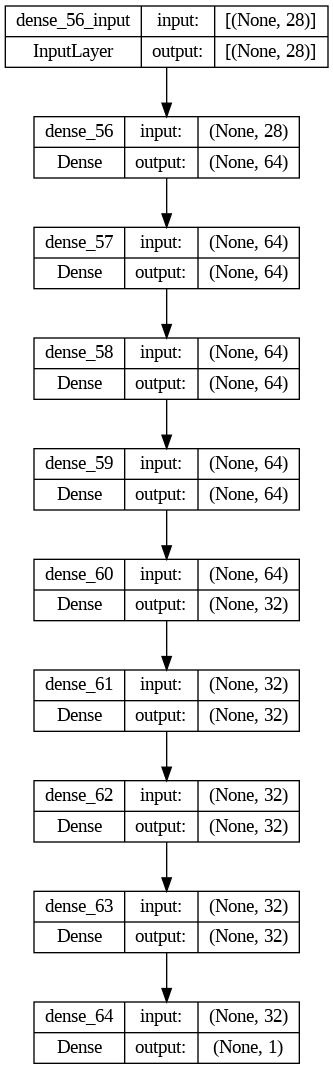

In [175]:
# Plot the network graph
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
210/210 [==============================] - 3s 4ms/step - loss: 39039580.0000 - mae: 4614.5972 - val_loss: 16074116.0000 - val_mae: 2779.0432
Epoch 2/10
210/210 [==============================] - 1s 3ms/step - loss: 16511281.0000 - mae: 2783.0237 - val_loss: 13947603.0000 - val_mae: 2616.8677
Epoch 3/10
210/210 [==============================] - 1s 3ms/step - loss: 14863967.0000 - mae: 2609.5168 - val_loss: 12648676.0000 - val_mae: 2479.3159
Epoch 4/10
210/210 [==============================] - 1s 3ms/step - loss: 13309761.0000 - mae: 2418.7314 - val_loss: 11485405.0000 - val_mae: 2390.6731
Epoch 5/10
210/210 [==============================] - 1s 3ms/step - loss: 12077105.0000 - mae: 2264.2112 - val_loss: 10381106.0000 - val_mae: 2138.9138
Epoch 6/10
210/210 [==============================] - 1s 4ms/step - loss: 11092890.0000 - mae: 2134.0479 - val_loss: 9288141.0000 - val_mae: 2046.4733
Epoch 7/10
210/210 [==============================] - 1s 4ms/step - loss: 10560412.0000 -

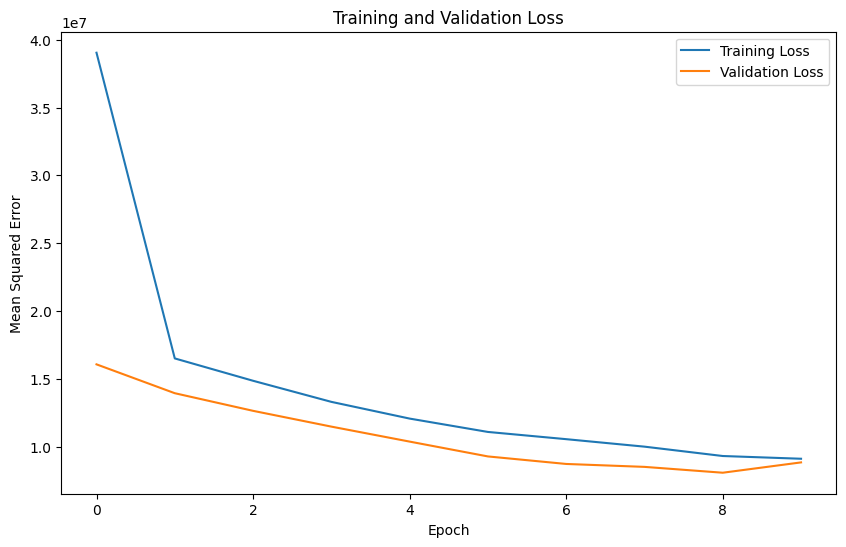

In [176]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [177]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

66/66 [==============================] - 0s 2ms/step - loss: 8979017.0000 - mae: 2008.4106
Mean Squared Error on Test Set: [8979017.0, 2008.41064453125]
